In [1]:
#Feature Extraction + FineTune, LR = 0.00001, Dense layer = 128, Freeze layer = 100, BatchSize=16, DropOut=0.3
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import time

# Define dataset path
dataset_path = "C:/School/Original Image/Watermelon"

# Define classes
selected_classes = ["Anthracnose", "Downy_Mildew", "Healthy", "Mosaic_Virus"]

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=30,
    channel_shift_range=0.2,
    shear_range=0.2,             # Shear transformation
    validation_split=0.2
)

# Load training and validation datasets
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical",
    subset="validation"
)

# Load MobileNetV2 base model (without top layers)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

# Feature Extraction Phase (Freeze base model)
base_model.trainable = False  

# Build classification model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(selected_classes), activation="softmax")
])

# Compile model (higher learning rate for feature extraction)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train Phase 1 (Feature Extraction)
print("\n### Training Phase 1: Feature Extraction ###")
start_time = time.time()
history_1 = model.fit(train_generator, validation_data=val_generator, epochs=20)
feature_extraction_time = time.time() - start_time

# Fine-Tuning Phase: Unfreeze the last 100 layers
base_model.trainable = True
for layer in base_model.layers[:-100]:  
    layer.trainable = False  # Keep earlier layers frozen

# Compile with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train Phase 2 (Fine-Tuning)
print("\n### Training Phase 2: Fine-Tuning ###")
start_time = time.time()
history_2 = model.fit(train_generator, validation_data=val_generator, epochs=30)
fine_tuning_time = time.time() - start_time



Found 924 images belonging to 4 classes.
Found 231 images belonging to 4 classes.

### Training Phase 1: Feature Extraction ###


C:\Users\Jesse Ugwu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3898 - loss: 1.4691

C:\Users\Jesse Ugwu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.3924 - loss: 1.4631 - val_accuracy: 0.8788 - val_loss: 0.5398
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.7581 - loss: 0.6328 - val_accuracy: 0.9048 - val_loss: 0.3682
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8628 - loss: 0.4006 - val_accuracy: 0.9567 - val_loss: 0.2382
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9185 - loss: 0.2752 - val_accuracy: 0.9437 - val_loss: 0.2278
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9255 - loss: 0.2347 - val_accuracy: 0.9481 - val_loss: 0.1941
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9428 - loss: 0.2069 - val_accuracy: 0.9394 - val_loss: 0.1847
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9554 - loss: 0.1724 - val_accuracy: 0.9827 - val_loss: 0.1351
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9782 - loss: 0.1282 - val_accuracy: 0.9827 - val_loss: 0.

In [2]:
model.save('watermelon_disease_modelFinetune128L100B.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

### Classification Report ###
              precision    recall  f1-score   support

 Anthracnose       1.00      1.00      1.00        31
Downy_Mildew       0.97      1.00      0.99        76
     Healthy       0.98      1.00      0.99        41
Mosaic_Virus       1.00      0.96      0.98        83

    accuracy                           0.99       231
   macro avg       0.99      0.99      0.99       231
weighted a

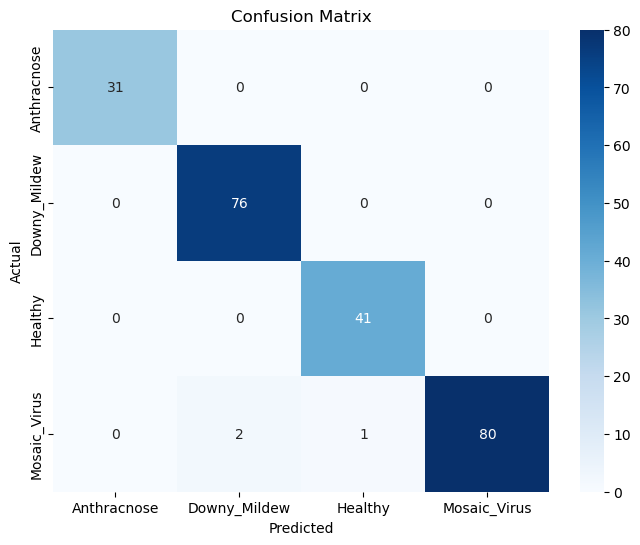

In [3]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Get true labels and predictions
y_true = []
y_pred = []

for _ in range(len(val_generator)):  # Iterate through batches
    x_batch, y_batch = next(val_generator)  # Get batch of images & labels
    y_true.extend(np.argmax(y_batch, axis=1))  # Convert one-hot to class index
    preds = model.predict(x_batch)
    y_pred.extend(np.argmax(preds, axis=1))  # Get predicted class index

# Generate classification report
print("\n### Classification Report ###")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


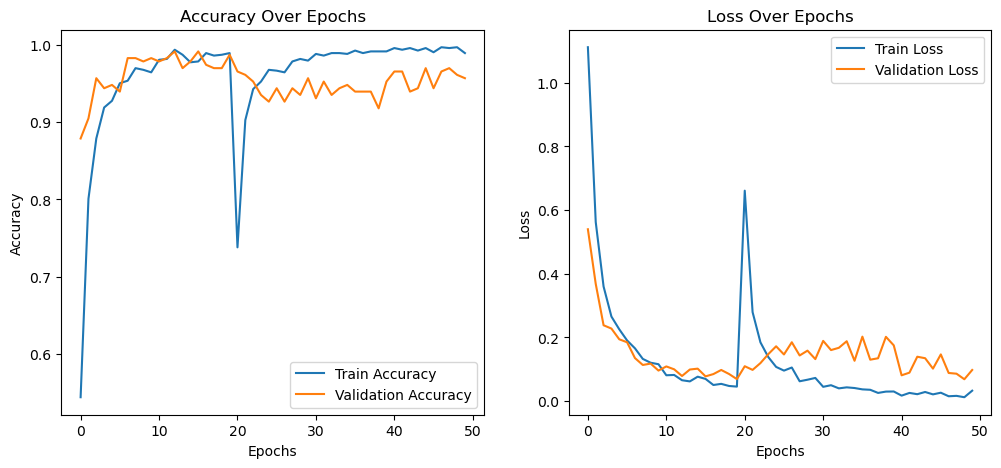


Feature Extraction Time: 3163.42 seconds
Fine-Tuning Time: 7470.84 seconds


In [4]:
# Merge histories for visualization
history = {
    "accuracy": history_1.history["accuracy"] + history_2.history["accuracy"],
    "val_accuracy": history_1.history["val_accuracy"] + history_2.history["val_accuracy"],
    "loss": history_1.history["loss"] + history_2.history["loss"],
    "val_loss": history_1.history["val_loss"] + history_2.history["val_loss"]
}

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history["accuracy"], label="Train Accuracy")
plt.plot(history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Print training times
print(f"\nFeature Extraction Time: {feature_extraction_time:.2f} seconds")
print(f"Fine-Tuning Time: {fine_tuning_time:.2f} seconds")


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import psutil  # For CPU usage

# --- Setup ---
# Folder where your test images are stored
test_image_Anthracnose = "C:/Users/Jesse Ugwu/OneDrive/EHU School Works/EHU 3rd Semester/Experiment Templates/Test Dataset/Anthracnose"  # Change this to your actual path
test_image_Downy_Mildew = "C:/Users/Jesse Ugwu/OneDrive/EHU School Works/EHU 3rd Semester/Experiment Templates/Test Dataset/Downy_Mildew"
test_image_Healthy = "C:/Users/Jesse Ugwu/OneDrive/EHU School Works/EHU 3rd Semester/Experiment Templates/Test Dataset/Healthy"
test_image_Mosaic_Virus = "C:/Users/Jesse Ugwu/OneDrive/EHU School Works/EHU 3rd Semester/Experiment Templates/Test Dataset/Mosaic_Virus"


# Replace with your path
model_path = 'watermelon_disease_modelFinetune128L100B.keras'         # Replace with your model

class_names = ["Anthracnose", "Downy_Mildew", "Healthy", "Mosaic_Virus"]

# --- Load Model ---
model = tf.keras.models.load_model(model_path)



#For Anthracnose Folder
# --- Preprocess All Images in Batch ---
def preprocess_batch_images(test_image_Anthracnose, target_size=(224, 224)):
    image_list = []
    file_names = []

    for filename in os.listdir(test_image_Anthracnose):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_image_Anthracnose, filename)
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = img_array / 255.0
            image_list.append(img_array)
            file_names.append(filename)

    return np.array(image_list), file_names

# --- Load and Preprocess Images ---
images, file_names = preprocess_batch_images(test_image_Anthracnose)

# --- Measure Inference Time and CPU Usage ---
start_time = time.time()
cpu_start = psutil.cpu_percent(interval=None)

predictions = model.predict(images)

cpu_end = psutil.cpu_percent(interval=None)
end_time = time.time()

# --- Results ---
inference_time = end_time - start_time
average_cpu = (cpu_start + cpu_end) / 2

print("Anthracnose Folder")
print(f"\n📈 Inference Time: {inference_time:.4f} seconds for {len(images)} images")
print(f"🧠 Average CPU Usage: {average_cpu:.2f}%")

# --- Display Predictions ---
for i, prediction in enumerate(predictions):
    predicted_class = class_names[np.argmax(prediction)]
    print(f"{file_names[i]} --> Predicted: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Anthracnose Folder

📈 Inference Time: 2.3963 seconds for 27 images
🧠 Average CPU Usage: 15.20%
5481774-PPT.jpg --> Predicted: Anthracnose
5481776-PPT.jpg --> Predicted: Anthracnose
5481785-PPT.jpg --> Predicted: Anthracnose
5481792-PPT.jpg --> Predicted: Anthracnose
5481829-PPT.jpg --> Predicted: Anthracnose
5553621-PPT.jpg --> Predicted: Anthracnose
5603205-PPT.jpg --> Predicted: Anthracnose
5603206-PPT.jpg --> Predicted: Anthracnose
5603207-PPT.jpg --> Predicted: Anthracnose
5603208-PPT.jpg --> Predicted: Anthracnose
5603212-PPT.jpg --> Predicted: Anthracnose
5603213-PPT.jpg --> Predicted: Anthracnose
5603214-PPT.jpg --> Predicted: Anthracnose
5603215-PPT.jpg --> Predicted: Anthracnose
AN1.jpg --> Predicted: Healthy
AN10.jpg --> Predicted: Anthracnose
AN2.jpg --> Predicted: Anthracnose
AN3.jpg --> Predicted: Anthracnose
AN4.jpg --> Predicted: Anthracnose
AN5.jpg --> Predicted: Anthracnose
AN5.png --> Predicted: Anthracnose
AN6.jpg --> Predicted: An

In [10]:
#For Downy_Mildew Folder
# --- Preprocess All Images in Batch ---
def preprocess_batch_images(test_image_Downy_Mildew , target_size=(224, 224)):
    image_list = []
    file_names = []

    for filename in os.listdir(test_image_Downy_Mildew):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_image_Downy_Mildew, filename)
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = img_array / 255.0
            image_list.append(img_array)
            file_names.append(filename)

    return np.array(image_list), file_names

# --- Load and Preprocess Images ---
images, file_names = preprocess_batch_images(test_image_Downy_Mildew)

# --- Measure Inference Time and CPU Usage ---
start_time = time.time()
cpu_start = psutil.cpu_percent(interval=None)

predictions = model.predict(images)

cpu_end = psutil.cpu_percent(interval=None)
end_time = time.time()

# --- Results ---
inference_time = end_time - start_time
average_cpu = (cpu_start + cpu_end) / 2

print("Downy_Mildew Folder")
print(f"\n📈 Inference Time: {inference_time:.4f} seconds for {len(images)} images")
print(f"🧠 Average CPU Usage: {average_cpu:.2f}%")

# --- Display Predictions ---
for i, prediction in enumerate(predictions):
    predicted_class = class_names[np.argmax(prediction)]
    print(f"{file_names[i]} --> Predicted: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Downy_Mildew Folder

📈 Inference Time: 3.0063 seconds for 14 images
🧠 Average CPU Usage: 17.70%
DM1.jpg --> Predicted: Downy_Mildew
DM10.jpg --> Predicted: Downy_Mildew
DM11.jpg --> Predicted: Healthy
DM12.jpg --> Predicted: Healthy
DM13.jpg --> Predicted: Healthy
DM14.jpg --> Predicted: Healthy
DM2.jpg --> Predicted: Downy_Mildew
DM3.jpg --> Predicted: Healthy
DM4.jpg --> Predicted: Downy_Mildew
DM5.jpg --> Predicted: Healthy
DM6.jpg --> Predicted: Mosaic_Virus
DM7.jpg --> Predicted: Mosaic_Virus
DM8.jpg --> Predicted: Downy_Mildew
DM9.jpg --> Predicted: Downy_Mildew


In [11]:
#For Healthy Folder
# --- Preprocess All Images in Batch ---
def preprocess_batch_images(test_image_Healthy, target_size=(224, 224)):
    image_list = []
    file_names = []

    for filename in os.listdir(test_image_Healthy):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_image_Healthy, filename)
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = img_array / 255.0
            image_list.append(img_array)
            file_names.append(filename)

    return np.array(image_list), file_names

# --- Load and Preprocess Images ---
images, file_names = preprocess_batch_images(test_image_Healthy)

# --- Measure Inference Time and CPU Usage ---
start_time = time.time()
cpu_start = psutil.cpu_percent(interval=None)

predictions = model.predict(images)

cpu_end = psutil.cpu_percent(interval=None)
end_time = time.time()

# --- Results ---
inference_time = end_time - start_time
average_cpu = (cpu_start + cpu_end) / 2

print("Healthy Folder")
print(f"\n📈 Inference Time: {inference_time:.4f} seconds for {len(images)} images")
print(f"🧠 Average CPU Usage: {average_cpu:.2f}%")

# --- Display Predictions ---
for i, prediction in enumerate(predictions):
    predicted_class = class_names[np.argmax(prediction)]
    print(f"{file_names[i]} --> Predicted: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Healthy Folder

📈 Inference Time: 0.1453 seconds for 2 images
🧠 Average CPU Usage: 24.05%
H1.jpg --> Predicted: Mosaic_Virus
H2.jpg --> Predicted: Healthy


In [12]:
#For Mosaic_Virus Folder
# --- Preprocess All Images in Batch ---
def preprocess_batch_images(test_image_Mosaic_Virus, target_size=(224, 224)):
    image_list = []
    file_names = []

    for filename in os.listdir(test_image_Mosaic_Virus):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_image_Mosaic_Virus, filename)
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = img_array / 255.0
            image_list.append(img_array)
            file_names.append(filename)

    return np.array(image_list), file_names

# --- Load and Preprocess Images ---
images, file_names = preprocess_batch_images(test_image_Mosaic_Virus)

# --- Measure Inference Time and CPU Usage ---
start_time = time.time()
cpu_start = psutil.cpu_percent(interval=None)

predictions = model.predict(images)

cpu_end = psutil.cpu_percent(interval=None)
end_time = time.time()

# --- Results ---
inference_time = end_time - start_time
average_cpu = (cpu_start + cpu_end) / 2

print("Mosaic_Virus Folder")
print(f"\n📈 Inference Time: {inference_time:.4f} seconds for {len(images)} images")
print(f"🧠 Average CPU Usage: {average_cpu:.2f}%")

# --- Display Predictions ---
for i, prediction in enumerate(predictions):
    predicted_class = class_names[np.argmax(prediction)]
    print(f"{file_names[i]} --> Predicted: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
Mosaic_Virus Folder

📈 Inference Time: 0.4471 seconds for 10 images
🧠 Average CPU Usage: 36.95%
MV1.jpg --> Predicted: Healthy
MV10.jpg --> Predicted: Downy_Mildew
MV2.jpg --> Predicted: Mosaic_Virus
MV3.jpg --> Predicted: Healthy
MV4.jpg --> Predicted: Healthy
MV5.jpg --> Predicted: Anthracnose
MV6.jpg --> Predicted: Downy_Mildew
MV7.jpg --> Predicted: Downy_Mildew
MV8.jpg --> Predicted: Mosaic_Virus
MV9.jpg --> Predicted: Downy_Mildew


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,088,206 (27.04 MB)

 Trainable params: 2,332,868 (8.90 MB)

 Non-trainable params: 89,600 (350.00 KB)

 Optimizer params: 4,665,738 (17.80 MB)

In [51]:
# Check the original TensorFlow model size
import os

model_path = 'watermelon_disease_modelFinetune128L100B.keras'
size_in_mb = os.path.getsize(model_path) / (1024 * 1024)
print(f"Original Model Size: {size_in_mb:.2f} MB")

Original Model Size: 27.67 MB


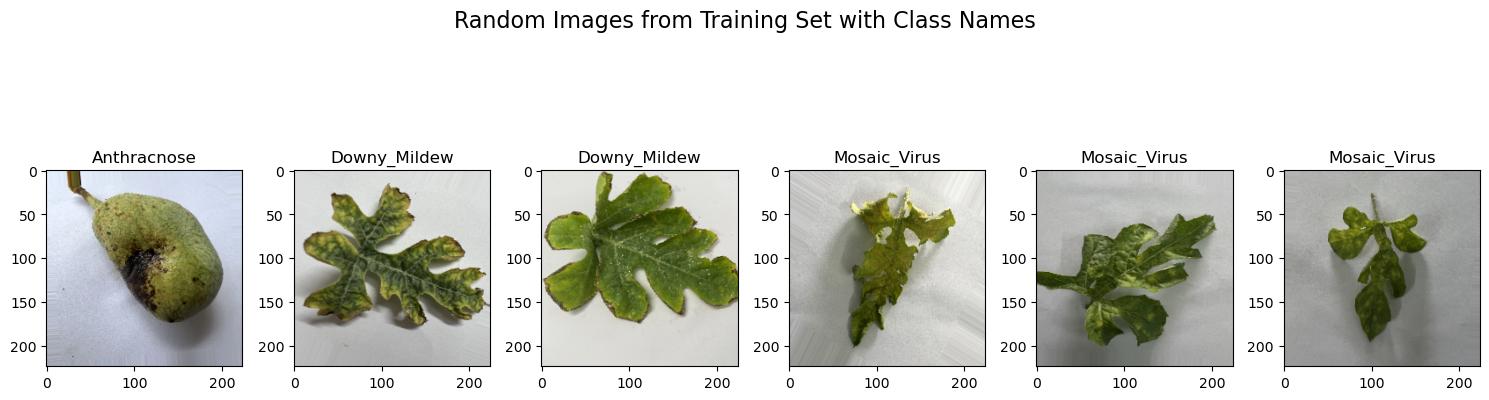

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Get class names from the generator
class_names = list(train_generator.class_indices.keys())

# Get a batch of images and labels
images, labels = next(train_generator)

# Number of images to show
num_images = 6
random_indices = np.random.choice(len(images), num_images, replace=False)

# Plot the images with their corresponding class names
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[idx])
    class_index = np.argmax(labels[idx])
    plt.title(class_names[class_index])
    #plt.axis('off')

plt.suptitle("Random Images from Training Set with Class Names", fontsize=16)
plt.tight_layout()
plt.show()


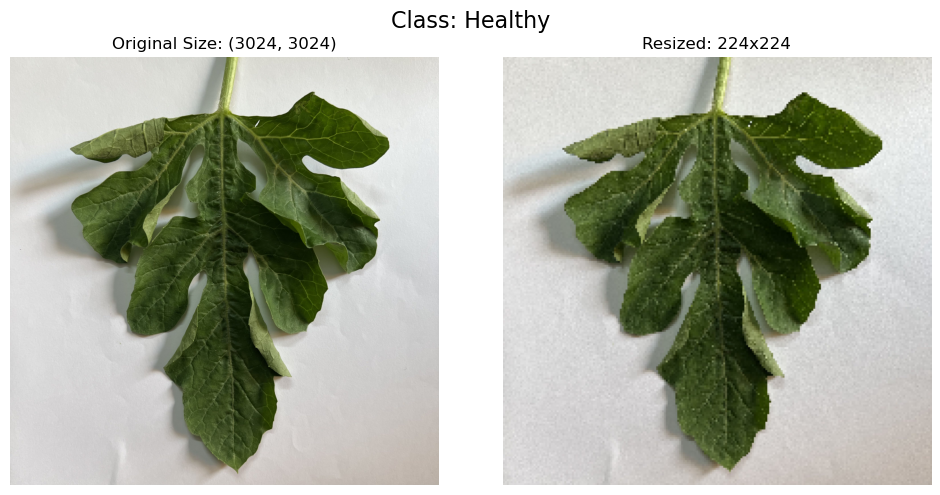

In [47]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Set one class directory to sample from
sample_class = random.choice(selected_classes)
class_dir = os.path.join(dataset_path, sample_class)

# Pick a random image from that class
filename = random.choice(os.listdir(class_dir))
img_path = os.path.join(class_dir, filename)

# Load original image
original_img = image.load_img(img_path)
original_array = image.img_to_array(original_img)

# Load resized image (224x224)
resized_img = image.load_img(img_path, target_size=(224, 224))
resized_array = image.img_to_array(resized_img)

# Plot both
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_array.astype("uint8"))
plt.title(f"Original Size: {original_img.size}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_array.astype("uint8"))
plt.title("Resized: 224x224")
plt.axis('off')

plt.suptitle(f"Class: {sample_class}", fontsize=16)
plt.tight_layout()
plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import psutil  # For CPU usage

# --- Setup ---
# Folder where your test images are stored
test_image_Anthracnose = "C:/Users/Jesse Ugwu/OneDrive/EHU School Works/EHU 3rd Semester/Experiment Templates/Test Dataset/Anthracnose"  # Change this to your actual path
test_image_Downy_Mildew = "C:/Users/Jesse Ugwu/OneDrive/EHU School Works/EHU 3rd Semester/Experiment Templates/Test Dataset/Downy_Mildew"
test_image_Healthy = "C:/Users/Jesse Ugwu/OneDrive/EHU School Works/EHU 3rd Semester/Experiment Templates/Test Dataset/Healthy"
test_image_Mosaic_Virus = "C:/Users/Jesse Ugwu/OneDrive/EHU School Works/EHU 3rd Semester/Experiment Templates/Test Dataset/Mosaic_Virus"


# Replace with your path
model_path = 'watermelon_disease_modelFinetune128L100B.keras'       # Replace with your model

class_names = ["Anthracnose", "Downy_Mildew", "Healthy", "Mosaic_Virus"]

# --- Load Model ---
model = tf.keras.models.load_model(model_path)



#For Anthracnose Folder
# --- Preprocess All Images in Batch ---
def preprocess_batch_images(test_image_Anthracnose, target_size=(224, 224)):
    image_list = []
    file_names = []

    for filename in os.listdir(test_image_Anthracnose):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_image_Anthracnose, filename)
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = img_array / 255.0
            image_list.append(img_array)
            file_names.append(filename)

    return np.array(image_list), file_names

# --- Load and Preprocess Images ---
images, file_names = preprocess_batch_images(test_image_Anthracnose)

# --- Measure Inference Time and CPU Usage ---
start_time = time.time()
cpu_start = psutil.cpu_percent(interval=None)

predictions = model.predict(images)

cpu_end = psutil.cpu_percent(interval=None)
end_time = time.time()

# --- Results ---
inference_time = end_time - start_time
average_cpu = (cpu_start + cpu_end) / 2

print("Anthracnose Folder")
print(f"\n📈 Inference Time: {inference_time:.4f} seconds for {len(images)} images")
print(f"🧠 Average CPU Usage: {average_cpu:.2f}%")

# --- Display Predictions ---
for i, prediction in enumerate(predictions):
    predicted_class = class_names[np.argmax(prediction)]
    print(f"{file_names[i]} --> Predicted: {predicted_class}")


#For Downy_Mildew Folder
# --- Preprocess All Images in Batch ---
def preprocess_batch_images(test_image_Downy_Mildew , target_size=(224, 224)):
    image_list = []
    file_names = []

    for filename in os.listdir(test_image_Downy_Mildew):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_image_Downy_Mildew, filename)
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = img_array / 255.0
            image_list.append(img_array)
            file_names.append(filename)

    return np.array(image_list), file_names

# --- Load and Preprocess Images ---
images, file_names = preprocess_batch_images(test_image_Downy_Mildew)

# --- Measure Inference Time and CPU Usage ---
start_time = time.time()
cpu_start = psutil.cpu_percent(interval=None)

predictions = model.predict(images)

cpu_end = psutil.cpu_percent(interval=None)
end_time = time.time()

# --- Results ---
inference_time = end_time - start_time
average_cpu = (cpu_start + cpu_end) / 2

print("Downy_Mildew Folder")
print(f"\n📈 Inference Time: {inference_time:.4f} seconds for {len(images)} images")
print(f"🧠 Average CPU Usage: {average_cpu:.2f}%")

# --- Display Predictions ---
for i, prediction in enumerate(predictions):
    predicted_class = class_names[np.argmax(prediction)]
    print(f"{file_names[i]} --> Predicted: {predicted_class}")

#For Healthy Folder
# --- Preprocess All Images in Batch ---
def preprocess_batch_images(test_image_Healthy, target_size=(224, 224)):
    image_list = []
    file_names = []

    for filename in os.listdir(test_image_Healthy):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_image_Healthy, filename)
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = img_array / 255.0
            image_list.append(img_array)
            file_names.append(filename)

    return np.array(image_list), file_names

# --- Load and Preprocess Images ---
images, file_names = preprocess_batch_images(test_image_Healthy)

# --- Measure Inference Time and CPU Usage ---
start_time = time.time()
cpu_start = psutil.cpu_percent(interval=None)

predictions = model.predict(images)

cpu_end = psutil.cpu_percent(interval=None)
end_time = time.time()

# --- Results ---
inference_time = end_time - start_time
average_cpu = (cpu_start + cpu_end) / 2

print("Healthy Folder")
print(f"\n📈 Inference Time: {inference_time:.4f} seconds for {len(images)} images")
print(f"🧠 Average CPU Usage: {average_cpu:.2f}%")

# --- Display Predictions ---
for i, prediction in enumerate(predictions):
    predicted_class = class_names[np.argmax(prediction)]
    print(f"{file_names[i]} --> Predicted: {predicted_class}")

#For Mosaic_Virus Folder
# --- Preprocess All Images in Batch ---
def preprocess_batch_images(test_image_Mosaic_Virus, target_size=(224, 224)):
    image_list = []
    file_names = []

    for filename in os.listdir(test_image_Mosaic_Virus):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(test_image_Mosaic_Virus, filename)
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = img_array / 255.0
            image_list.append(img_array)
            file_names.append(filename)

    return np.array(image_list), file_names

# --- Load and Preprocess Images ---
images, file_names = preprocess_batch_images(test_image_Mosaic_Virus)

# --- Measure Inference Time and CPU Usage ---
start_time = time.time()
cpu_start = psutil.cpu_percent(interval=None)

predictions = model.predict(images)

cpu_end = psutil.cpu_percent(interval=None)
end_time = time.time()

# --- Results ---
inference_time = end_time - start_time
average_cpu = (cpu_start + cpu_end) / 2

print("Mosaic_Virus Folder")
print(f"\n📈 Inference Time: {inference_time:.4f} seconds for {len(images)} images")
print(f"🧠 Average CPU Usage: {average_cpu:.2f}%")

# --- Display Predictions ---
for i, prediction in enumerate(predictions):
    predicted_class = class_names[np.argmax(prediction)]
    print(f"{file_names[i]} --> Predicted: {predicted_class}")



ValueError: File not found: filepath=watermelon_disease_modelFinetune128L100B.keras. Please ensure the file is an accessible `.keras` zip file.

In [55]:
#Convert to tensorflow lite 
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('watermelon_disease_modelFinetune128L100B.keras')

# Convert to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save TFLite model
with open("mobilenet_v2_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model converted to TFLite successfully!")


INFO:tensorflow:Assets written to: C:\Users\JESSEU~1\AppData\Local\Temp\tmp2fc37g78\assets


INFO:tensorflow:Assets written to: C:\Users\JESSEU~1\AppData\Local\Temp\tmp2fc37g78\assets


Saved artifact at 'C:\Users\JESSEU~1\AppData\Local\Temp\tmp2fc37g78'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2846080860240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2846080873680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2846080860432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2846080872912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2846080874064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2846080875600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2846080875024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2846080875408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2846080876176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2846080873488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2

In [57]:
#let see the size of the tensorflow lite converted model
file_size = os.path.getsize("mobilenet_v2_model.tflite") / (1024 * 1024)
print(f"TFLite Model Size: {file_size:.2f} MB")


TFLite Model Size: 9.08 MB


In [59]:
import tensorflow as tf
import numpy as np
import os
import time
import psutil
from tensorflow.keras.preprocessing import image

# --- Setup ---
tflite_model_path = "mobilenet_v2_model.tflite"  # <- Your TFLite model here
test_image_dir = "C:/Users/Jesse Ugwu/OneDrive/EHU School Works/EHU 3rd Semester/Experiment Templates/Test Dataset/Anthracnose"

class_names = ["Anthracnose", "Downy_Mildew", "Healthy", "Mosaic_Virus"]

# --- Load TFLite Model ---
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape'][1:3]

# --- Preprocess Images ---
def preprocess_batch_images(image_dir, target_size=(224, 224)):
    image_list = []
    file_names = []

    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(image_dir, filename)
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = img_array / 255.0
            image_list.append(img_array)
            file_names.append(filename)

    return np.array(image_list, dtype=np.float32), file_names

images, file_names = preprocess_batch_images(test_image_dir, input_shape)

# --- Run Inference ---
print("Running inference with TFLite...")

start_time = time.time()
cpu_start = psutil.cpu_percent(interval=None)

predictions = []
for img in images:
    input_data = np.expand_dims(img, axis=0).astype(np.float32)

    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predictions.append(output_data[0])

cpu_end = psutil.cpu_percent(interval=None)
end_time = time.time()

# --- Results ---
inference_time = end_time - start_time
average_cpu = (cpu_start + cpu_end) / 2

print("Anthracnose Folder")
print(f"\n📈 Inference Time (TFLite): {inference_time:.4f} seconds for {len(images)} images")
print(f"🧠 Average CPU Usage: {average_cpu:.2f}%")

# --- Display Predictions ---
for i, prediction in enumerate(predictions):
    predicted_class = class_names[np.argmax(prediction)]
    print(f"{file_names[i]} --> Predicted: {predicted_class}")


Running inference with TFLite...
Anthracnose Folder

📈 Inference Time (TFLite): 0.0720 seconds for 7 images
🧠 Average CPU Usage: 11.55%
AN1.jpg --> Predicted: Healthy
AN2.jpg --> Predicted: Anthracnose
AN3.jpg --> Predicted: Anthracnose
AN4.jpg --> Predicted: Anthracnose
Anthracnose-symptoms-on-watermelon-fruit-sunken-necrotic-lesion-with-orange-conidial.png --> Predicted: Anthracnose
R.png --> Predicted: Anthracnose
Symptoms-of-watermelon-anthracnose-on-leaves-stems-and-fruits-in-the-field-a-d.png --> Predicted: Anthracnose


In [61]:
# --- Run Inference per Image and Measure Times ---
inference_times = []
predictions = []

print("Running per-image inference...")

for img in images:
    input_data = np.expand_dims(img, axis=0).astype(np.float32)
    
    start_time = time.time()
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    end_time = time.time()

    predictions.append(output_data[0])
    inference_times.append(end_time - start_time)

# --- Results ---
total_time = sum(inference_times)
avg_time_per_image = total_time / len(images)
fps = 1 / avg_time_per_image if avg_time_per_image > 0 else 0

print(f"\n📊 Total Time: {total_time:.4f} seconds for {len(images)} images")
print(f"⏱️ Average Inference Time per Image: {avg_time_per_image:.6f} seconds")
print(f"🚀 FPS (Frames Per Second): {fps:.2f}")


Running per-image inference...

📊 Total Time: 0.0675 seconds for 7 images
⏱️ Average Inference Time per Image: 0.009648 seconds
🚀 FPS (Frames Per Second): 103.64


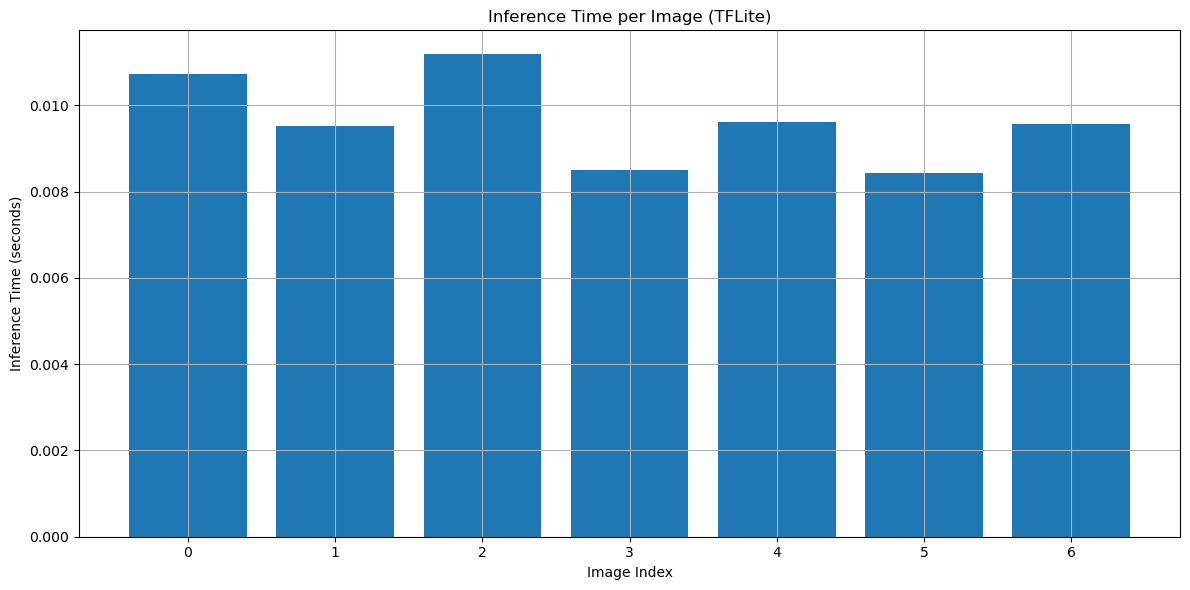

In [63]:
import matplotlib.pyplot as plt

# Plot inference time per image
plt.figure(figsize=(12, 6))
plt.bar(range(len(inference_times)), inference_times)
plt.xlabel("Image Index")
plt.ylabel("Inference Time (seconds)")
plt.title("Inference Time per Image (TFLite)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
#Plotting TFLite vs Keras Comparison (if you've also timed the Keras model)

keras_total_time = 2.65  # example value from your earlier Keras test
keras_avg_time = keras_total_time / len(images)

tflite_total_time = total_time
tflite_avg_time = avg_time_per_image


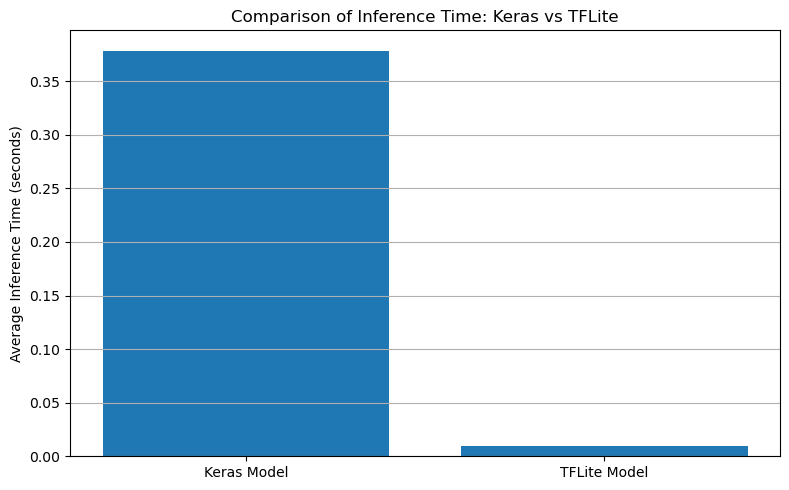

In [69]:
# Bar chart: TFLite vs Keras average inference time
labels = ['Keras Model', 'TFLite Model']
avg_times = [keras_avg_time, tflite_avg_time]

plt.figure(figsize=(8, 5))
plt.bar(labels, avg_times)
plt.ylabel("Average Inference Time (seconds)")
plt.title("Comparison of Inference Time: Keras vs TFLite")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#Evaluation using Live Dataset

Found 82 images belonging to 4 classes.


C:\Users\Jesse Ugwu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step  
Classification Report:
              precision    recall  f1-score   support

 Anthracnose       0.83      0.89      0.86        27
Downy_Mildew       0.67      0.40      0.50        30
     Healthy       0.29      0.55      0.38        11
Mosaic_Virus       0.29      0.29      0.29        14

    accuracy                           0.56        82
   macro avg       0.52      0.53      0.50        82
weighted avg       0.60      0.56      0.56        82



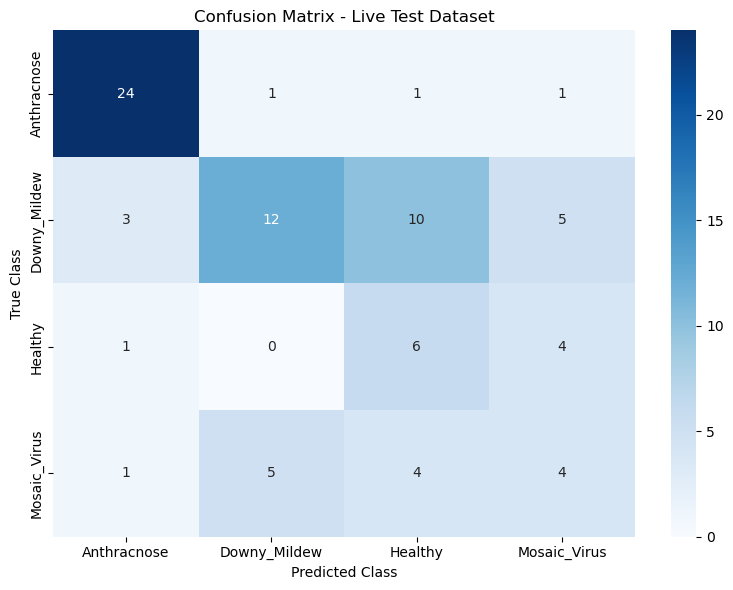

In [9]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The path to the live test dataset (structured in 4 folders: one per class)
test_dir = "C:/Users/Jesse Ugwu/OneDrive/EHU School Works/EHU 3rd Semester/Experiment Templates/Test Dataset" 

# Loading the trained model
model = load_model('watermelon_disease_modelFinetune128L100B.keras')

# Image parameters
img_height = 224
img_width = 224
batch_size = 32  

# Prepare the image generator for the live dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict the classes
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Live Test Dataset")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.tight_layout()
plt.show()


In [1]:
#Image format
from PIL import Image
import os
from collections import Counter

# Dataset path and classes
dataset_path = "C:/School/Original Image/Watermelon"
selected_classes = ["Anthracnose", "Downy_Mildew", "Healthy", "Mosaic_Virus"]

# Store overall and class-wise format counts
overall_formats = Counter()
class_format_counts = {}

# Process each class directory
for class_name in selected_classes:
    class_dir = os.path.join(dataset_path, class_name)
    class_formats = Counter()

    for file in os.listdir(class_dir):
        file_path = os.path.join(class_dir, file)
        try:
            with Image.open(file_path) as img:
                fmt = img.format
                class_formats[fmt] += 1
                overall_formats[fmt] += 1
        except Exception as e:
            print(f"Skipping file {file_path}: {e}")

    class_format_counts[class_name] = class_formats

# Print results
print("Class-wise image format counts:\n")
for class_name, fmt_counts in class_format_counts.items():
    print(f"{class_name}:")
    for fmt, count in fmt_counts.items():
        print(f"  {fmt}: {count}")
    print()

print("Overall format counts across dataset:")
for fmt, count in overall_formats.items():
    print(f"{fmt}: {count}")


Class-wise image format counts:

Anthracnose:
  JPEG: 155

Downy_Mildew:
  JPEG: 380

Healthy:
  JPEG: 205

Mosaic_Virus:
  JPEG: 415

Overall format counts across dataset:
JPEG: 1155


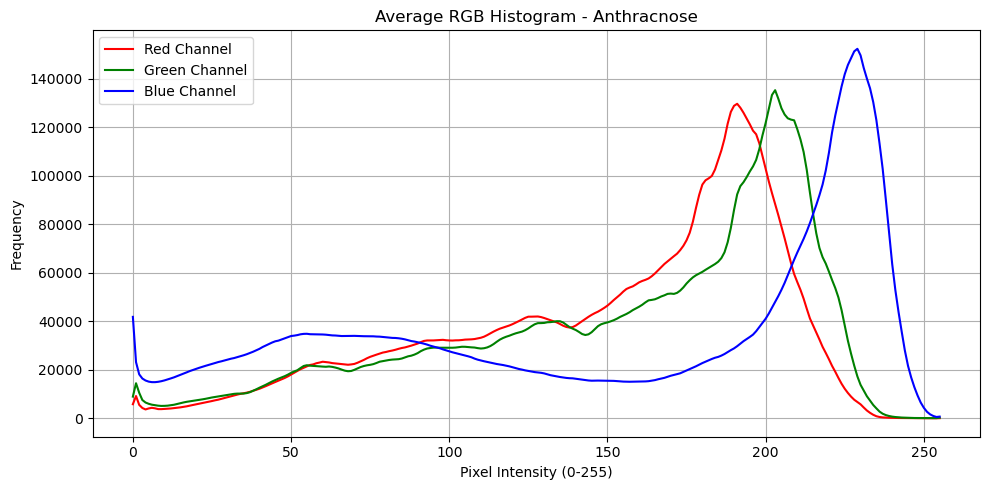

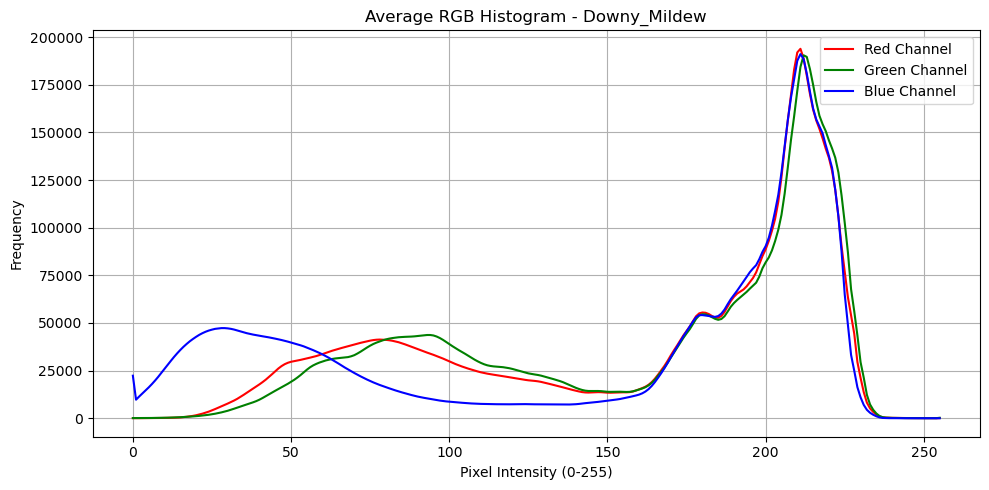

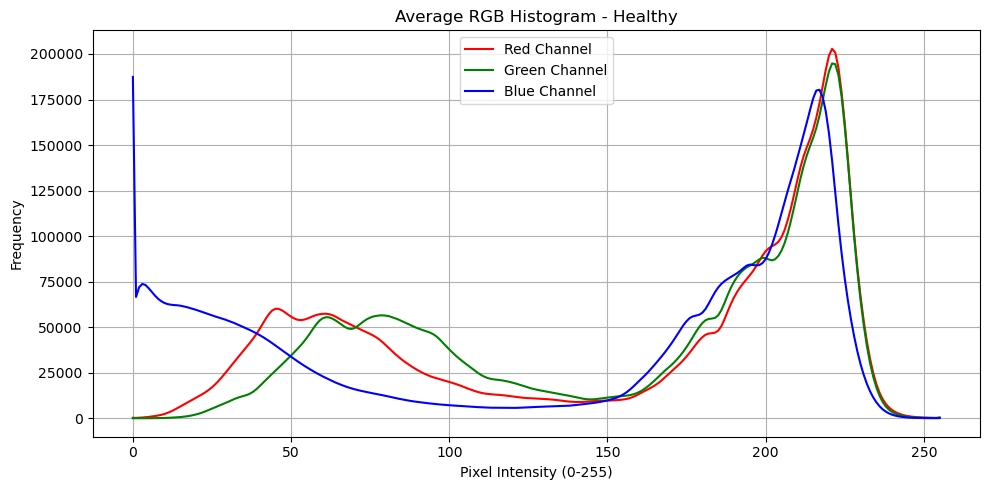

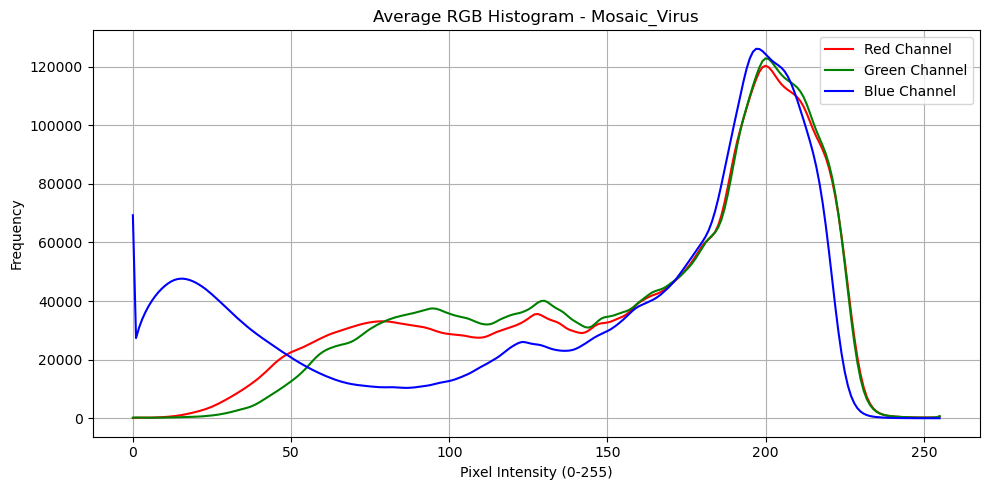

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define dataset path
dataset_path = "C:/School/Original Image/Watermelon"

# Define classes
selected_classes = ["Anthracnose", "Downy_Mildew", "Healthy", "Mosaic_Virus"]

# Function to calculate RGB histogram
def calculate_rgb_histogram(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])
    return hist_r, hist_g, hist_b

# Function to compute average histogram per class
def average_class_histograms(class_folder):
    all_r, all_g, all_b = [], [], []
    for filename in os.listdir(class_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_folder, filename)
            hist = calculate_rgb_histogram(img_path)
            if hist:
                r, g, b = hist
                all_r.append(r)
                all_g.append(g)
                all_b.append(b)
    if not all_r:
        return None, None, None
    avg_r = np.mean(all_r, axis=0)
    avg_g = np.mean(all_g, axis=0)
    avg_b = np.mean(all_b, axis=0)
    return avg_r, avg_g, avg_b

# Function to plot histograms
def plot_histograms(avg_r, avg_g, avg_b, class_name):
    plt.figure(figsize=(10, 5))
    plt.plot(avg_r, color='red', label='Red Channel')
    plt.plot(avg_g, color='green', label='Green Channel')
    plt.plot(avg_b, color='blue', label='Blue Channel')
    plt.title(f"Average RGB Histogram - {class_name}")
    plt.xlabel("Pixel Intensity (0-255)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Loop through each class and plot histograms
for class_name in selected_classes:
    class_path = os.path.join(dataset_path, class_name)
    avg_r, avg_g, avg_b = average_class_histograms(class_path)
    if avg_r is not None:
        plot_histograms(avg_r, avg_g, avg_b, class_name)
    else:
        print(f"No valid images found in {class_name}")
